In [1]:
from CelestialObjects import Planets, Stars
from MaterialProperty import MaterialProperty
from NBodySimulator import Simulator
from Conversion import distance_conversion, mass_conversion
import numpy as np

In [2]:
materials = MaterialProperty(material_list=["silicates"], material_fraction=[1])
material = materials.planet_material_property()
distance = distance_conversion([1], "AU")[0]
mass = mass_conversion([1], "Ms")[0]
radius = 6.9634e8
sun_speed = 0#2.20e5
earth_speed = sun_speed + 2.98e4
moon_speed = earth_speed + 1022
earth_distance = distance
moon_distance = 3.844e8 + distance
#earth_speed = 0
#moon_speed = 1022.0
Sun =Stars(name="Sun", mass=mass, temperature=5300, init_position=[0,0,0], init_velocity=[0,sun_speed,0],radius=radius)
Earth = Planets(name="Earth", mass=5.972e24, init_position=[earth_distance,0,0], init_velocity=[0,earth_speed,0], radius=6.4e6, planet_type="Rocky", planet_contour="Earth-like", material_property=material)
Moon = Planets(name="Moon", mass=7.348e22, init_position=[moon_distance, 0, 0], init_velocity=[0,moon_speed, 0], radius=1e5, planet_type="Rocky", planet_contour="Mars-like", material_property=material)
#Rock = Planets(name="Rock", mass=3e23, radius=1e6, init_position=[-1.76e8,0,0], init_velocity=[0, 198.0, 0], planet_contour="Earth-like", planet_type="Rocky", material_property=material)

In [3]:
simulation = Simulator(celestial_bodies=[Earth, Moon, Sun], time_step=1000, simulation_time=1e8)

In [5]:
simulation.solve(formulation="Hamiltonian", solver="forest_ruth", correction=False)

In [5]:
x = np.array(Earth.trajectory)
#y = np.array(Rock.trajectory)
#z = np.array(Moon.trajectory)
s = np.array(Rock.trajectory)

In [12]:
#len(simulation.celestial_bodies)
simulation.celestial_bodies
simulation.removed_object_list

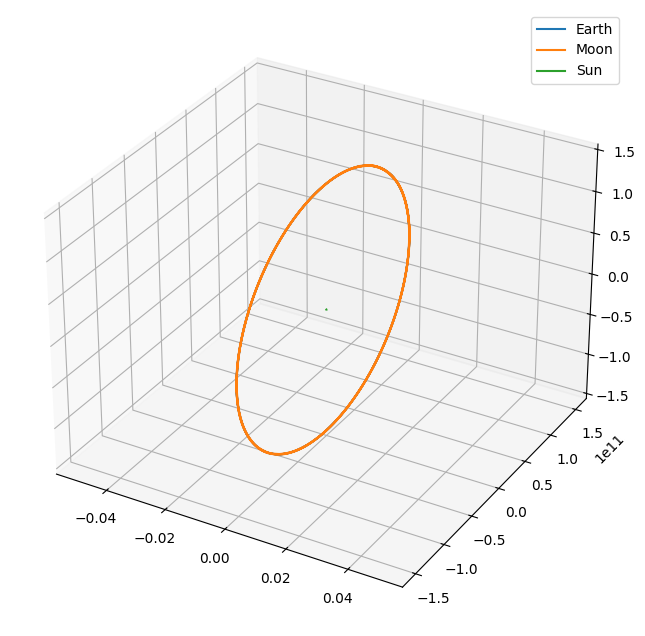

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

for body in simulation.celestial_bodies:
    pos = np.array(body.trajectory)
    if body.object_type != "fragment":
        ax.plot(pos[:,0], pos[:,1], pos[:,2], label=body.name)
    else:
        ax.plot(pos[:,0], pos[:,1], pos[:,2], color="black")
        pass
for body in simulation.removed_object_list:
    pos = np.array(body.trajectory)
    try:
        ax.plot(pos[:,0], pos[:,1], pos[:,2], color="red")
    except IndexError:
        pass
plt.legend()
plt.show()

In [10]:
import pyvista as pv
import time

plotter = pv.Plotter()
plotter.set_background("black")

s1 = pv.Sphere(radius=100*Earth.radius, center=x[0])
s2 = pv.Sphere(radius=100*Moon.radius, center=z[0])
s3 = pv.Sphere(radius=100*Sun.radius, center=s[0])

earth = plotter.add_mesh(s1, color="blue")
moon = plotter.add_mesh(s2, color="grey")
sun = plotter.add_mesh(s3, color="yellow")

def update_scene(i):
    earth.SetPosition(x[i])
    moon.SetPosition(z[i])
    sun.SetPosition(s[i])
    plotter.render()

plotter.open_gif("Animation.gif")
for i in range(x.shape[0]//1000):
    update_scene(i)
    plotter.write_frame()

plotter.close()

In [1]:
from CelestialObjects import Stars, BlackHole
from MassiveObjectSimulator import SchwarzschildSimulator
import numpy as np
import matplotlib.pyplot as plt

mass = 1.989e30
radius = 6.9634e8
distance = 1.496e10
speed = 2.98e7
black_hole = BlackHole(name="BH", mass=mass*1e6, init_position=[0,0,0], init_velocity=[0,0,0])
star1 = Stars(name="A", mass=mass, init_position=[distance,0,0], init_velocity=[0,2*speed,0], radius=radius, temperature=5300)
star2 = Stars(name="B", mass=mass, init_position=[1.5*distance,0.5*distance,0], init_velocity=[0,speed,speed], radius=radius, temperature=5300)
star3 = Stars(name="C", mass=mass, init_position=[2*distance,-0.5*distance,0], init_velocity=[speed,0,0.5*speed], radius=radius, temperature=5300)
star4 = Stars(name="D", mass=mass, init_position=[0,-distance,0], init_velocity=[-speed,0,0], radius=radius, temperature=5300)

In [2]:
sim = SchwarzschildSimulator(dense_body=black_hole, stars=[star1,star2,star3,star4], time_step=1, simulation_time=500)
sim.solve()

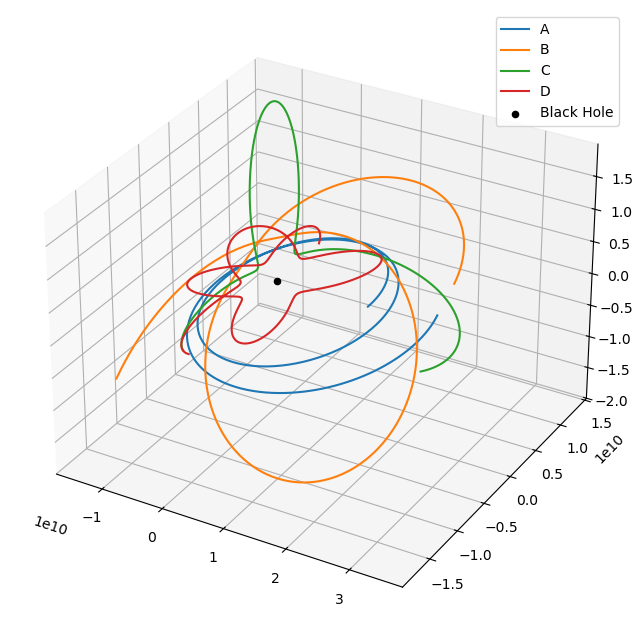

In [3]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

for star in sim.stars:
    pos = np.array(star.trajectory)
    ax.plot(pos[:,1], pos[:,2], pos[:,3], label=star.name)
ax.scatter(0,0,0, color="black", label="Black Hole")
plt.legend()
plt.show()

In [4]:
stars = [star1, star2, star3, star4]
for star in stars:
    np.savetxt(f"{star.name}.txt", star.trajectory)